# Importing Libraries

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics as m
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Importing DataSet

In [2]:
df = pd.read_csv('datasets/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Basic Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data Visualization

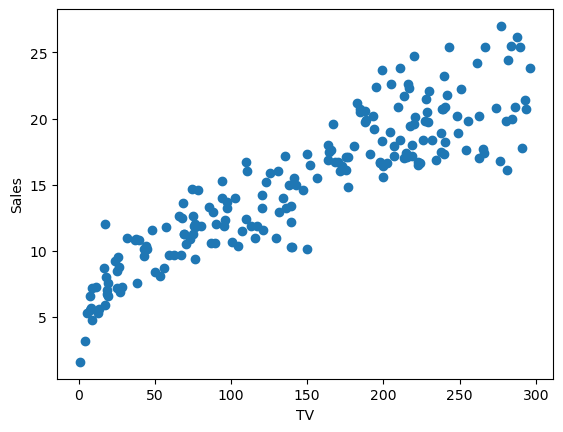

In [13]:
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

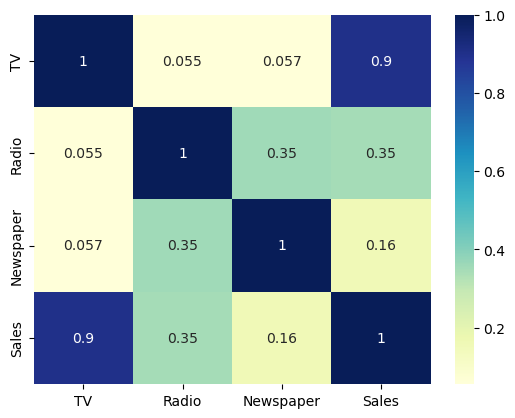

In [16]:
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

# Splitting Dataset into Independent and Dependent Variables

In [18]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


In [19]:
print(X.shape)
print(y.shape)

(200, 3)
(200,)


## Splitting Dataset into Training and Testing Set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(160, 3) (160,)
(40, 3) (40,)


## Data Normalization 

In [26]:
x_train_norm = StandardScaler().fit(X_train).transform(X_train)
x_test_norm = StandardScaler().fit(X_test).transform(X_test)
x_train_norm

array([[-1.29793425e+00,  1.31029192e+00, -1.12911795e+00],
       [-3.06299367e-01, -1.79168196e-01, -8.59088713e-01],
       [-2.73636548e-02,  4.92820785e-01, -8.12531947e-01],
       [-1.25492655e+00,  2.57278255e-01, -4.44733501e-01],
       [ 8.06985898e-01,  1.89914824e+00,  3.56042863e-01],
       [-1.45399080e+00,  7.49146478e-01, -5.00601619e-01],
       [ 5.25592602e-01, -3.45433511e-01, -5.65781091e-01],
       [ 1.06871853e+00, -9.41217555e-01, -9.94103332e-01],
       [-1.69360518e+00,  4.09688127e-01,  5.28302895e-01],
       [-7.28289470e-02, -5.46337433e-01, -2.07293998e-01],
       [-1.01776975e+00, -6.64108697e-01, -5.47158385e-01],
       [ 7.59063022e-01, -9.55072998e-01, -1.70048585e-01],
       [ 1.85883158e+00,  9.77761286e-01,  3.29843043e+00],
       [ 2.25767432e-01,  1.01239989e+00, -1.05462713e+00],
       [ 1.13384449e+00, -1.18368781e+00, -3.05063205e-01],
       [-1.12590342e+00, -1.39844717e+00, -4.02832412e-01],
       [ 1.61921720e+00,  1.85065419e+00

# Model Selection (Linear Regression)

In [34]:
model = LinearRegression()
model

LinearRegression()

In [35]:
model.fit(x_train_norm, y_train)

LinearRegression()

## Model Predictions

In [36]:
pred = model.predict(x_test_norm)
pred

array([17.58821568, 10.71893283, 17.68166789, 21.94148606, 19.0339445 ,
       14.25994225, 15.44365166, 19.03059344, 19.29073433, 10.79018064,
       22.25580386,  8.89782273, 10.5276849 , 18.35109724, 18.6023941 ,
       12.91990418, 19.26612893,  8.73304522, 19.77603837, 18.91114472,
       15.74313227,  9.51481878, 21.06126859, 14.31155468, 18.61484832,
        8.42794504, 10.53205463, 11.33476512, 20.05940828,  8.34376066,
       13.0055586 , 19.14049623,  6.80356642,  6.8250436 , 18.47765489,
       17.66852567,  8.93965421, 18.86280543, 10.32155018, 15.44117488])

# Evaluation

In [53]:
MAE = m.mean_absolute_error(y_test, pred)
MSE = m.mean_squared_error(y_test, pred)
R2_score = m.r2_score(y_test, pred)

In [54]:
print(MAE, MSE, R2_score)

2.095487316841883 7.149379020824028 0.8210785235800597


In [55]:
metrics = {
    'Model' : ['Linear Regression'],
    'MeanAbsoluteError' : [MAE],
    'MeanSquaredError' : [MSE],
    'R2_SCORE' : [R2_score]
}


In [56]:
final_report = pd.DataFrame(data = metrics)
final_report

,Model,MeanAbsoluteError,MeanSquaredError,R2_SCORE
0,Linear Regression,2.095487,7.149379,0.821079
